In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df = pd.read_csv("Large_Medical_Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Disease   5000 non-null   object
 1   Symptom   5000 non-null   object
 2   Medicine  5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB


In [4]:
df.head()

,Disease,Symptom,Medicine
0,Heart Disease,Muscle Weakness,Isoniazid
1,Bronchitis,Joint Pain,Adalimumab
2,Eczema,Night Sweats,Budesonide
3,Sinusitis,Diarrhea,Terbinafine
4,Osteoporosis,Shortness of breath,Ciprofloxacin


In [5]:
df.tail()

,Disease,Symptom,Medicine
4995,Acne,Runny Nose,Loratadine
4996,Influenza,Sore Throat,Ibuprofen
4997,Tuberculosis,Night Sweats,Ranitidine
4998,Glaucoma,Vomiting,Levothyroxine
4999,Tuberculosis,Dizziness,Ondansetron


In [6]:
df.describe()

,Disease,Symptom,Medicine
count,5000,5000,5000
unique,37,30,30
top,Glaucoma,Tremors,Loratadine
freq,160,198,189


In [24]:
missing = df.isnull().sum()
print(missing)

Disease     0
Symptom     0
Medicine    0
dtype: int64


In [25]:
df.shape

(5000, 3)

In [9]:
df.columns

Index(['Disease', 'Symptom', 'Medicine'], dtype='object')

In [26]:
# Extract unique symptoms from all symptom columns
unique_symptoms = pd.unique(df.iloc[:, 1:].values.ravel())
unique_symptoms = [symptom for symptom in unique_symptoms if pd.notna(symptom)]

# Create a binary matrix for symptoms
binary_matrix = pd.DataFrame(0, index=df.index, columns=unique_symptoms)

# Fill the binary matrix
for col in df.columns[1:]:  # Skip the 'Disease' column
    for index, symptom in df[col].dropna().items():
        binary_matrix.at[index, symptom] = 1

# Concatenate the disease column with the binary matrix
processed_df = pd.concat([df[['Disease']], binary_matrix], axis=1)

# Display the first few rows of the processed dataset
processed_df.head()


,Disease,Muscle Weakness,Isoniazid,Joint Pain,Adalimumab,Night Sweats,Budesonide,Diarrhea,Terbinafine,Shortness of breath,...,Rifampin,Doxycycline,Topiramate,Loperamide,Fatigue,Sumatriptan,Hydrocortisone,Vomiting,Ear Pain,Cetirizine
0,Heart Disease,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bronchitis,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Eczema,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sinusitis,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Osteoporosis,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df.shape

(5000, 3)

In [28]:
# Check for duplicate rows
duplicate_rows = processed_df.duplicated().sum()
duplicate_rows


np.int64(319)

In [29]:
processed_df = processed_df.copy()
# Summarize duplicates by counting occurrences of each unique row
summarized_df = processed_df.groupby(list(processed_df.columns)).size().reset_index(name='Count')

In [30]:
# Display the first few rows of the summarized dataset
summarized_df.head()

,Disease,Muscle Weakness,Isoniazid,Joint Pain,Adalimumab,Night Sweats,Budesonide,Diarrhea,Terbinafine,Shortness of breath,...,Doxycycline,Topiramate,Loperamide,Fatigue,Sumatriptan,Hydrocortisone,Vomiting,Ear Pain,Cetirizine,Count
0,Acne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,Acne,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,Acne,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2
3,Acne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,Acne,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [31]:
summarized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4681 entries, 0 to 4680
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Disease              4681 non-null   object
 1   Muscle Weakness      4681 non-null   int64 
 2   Isoniazid            4681 non-null   int64 
 3   Joint Pain           4681 non-null   int64 
 4   Adalimumab           4681 non-null   int64 
 5   Night Sweats         4681 non-null   int64 
 6   Budesonide           4681 non-null   int64 
 7   Diarrhea             4681 non-null   int64 
 8   Terbinafine          4681 non-null   int64 
 9   Shortness of breath  4681 non-null   int64 
 10  Ciprofloxacin        4681 non-null   int64 
 11  Fever                4681 non-null   int64 
 12  Prednisone           4681 non-null   int64 
 13  High Blood Pressure  4681 non-null   int64 
 14  Ibuprofen            4681 non-null   int64 
 15  Aspirin              4681 non-null   int64 
 16  Chest 

In [32]:
# Count occurrences of each unique disease in the summarized dataset
disease_counts = summarized_df.groupby("Disease")["Count"].sum().reset_index()

# Display the unique diseases and their total counts
disease_counts


,Disease,Count
0,Acne,140
1,Allergy,122
2,Arthritis,146
3,Asthma,148
4,Bronchitis,138
5,COVID-19,143
6,Chickenpox,140
7,Chronic Kidney Disease,104
8,Common Cold,132
9,Dengue,131


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import warnings

# Suppress warnings for clarity
warnings.filterwarnings("ignore")

# Load your dataset (adjust the path and column names accordingly)
# data = pd.read_csv("path/to/your/dataset.csv")
# For illustration, assume summarized_df has feature columns 'feature1', 'feature2', 'feature3' and target 'target'
X = summarized_df.drop('Disease',axis=1)
y = summarized_df['Disease']

In [34]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)  # Ensure consistency

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3744 entries, 4109 to 860
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Muscle Weakness      3744 non-null   int64
 1   Isoniazid            3744 non-null   int64
 2   Joint Pain           3744 non-null   int64
 3   Adalimumab           3744 non-null   int64
 4   Night Sweats         3744 non-null   int64
 5   Budesonide           3744 non-null   int64
 6   Diarrhea             3744 non-null   int64
 7   Terbinafine          3744 non-null   int64
 8   Shortness of breath  3744 non-null   int64
 9   Ciprofloxacin        3744 non-null   int64
 10  Fever                3744 non-null   int64
 11  Prednisone           3744 non-null   int64
 12  High Blood Pressure  3744 non-null   int64
 13  Ibuprofen            3744 non-null   int64
 14  Aspirin              3744 non-null   int64
 15  Chest Pain           3744 non-null   int64
 16  Metformin            3744 n

In [37]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
}

# Dictionary to store evaluation metrics for each model
results = {}

# Function to calculate MSPE
def calculate_mspe(y_true, y_pred):
    # Avoid division by zero: Only compute for non-zero y_true values
    mask = y_true != 0
    return np.mean(np.square((y_true[mask] - y_pred[mask]) / y_true[mask]))

# Train each model and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mspe = calculate_mspe(np.array(y_test), predictions)
    
    results[name] = {"R2 Score": r2, "MAE": mae, "MSE": mse, "MSPE": mspe}

# Convert results into a DataFrame for clear comparison
results_df = pd.DataFrame(results).T
print(results_df)

# Select best model based on the highest R2 and lowest errors.
# Here, as an example, we might pick the model with the highest R2 score:
best_model_name = results_df["R2 Score"].idxmax()
print(f"\nThe best model based on R2 Score is: {best_model_name}")

                   R2 Score        MAE         MSE       MSPE
Decision Tree     -0.412108  10.948883  170.951951  17.846894
Random Forest     -0.297943  10.542278  157.130973  17.922707
Gradient Boosting -0.021945   9.719782  123.718203  14.703136

The best model based on R2 Score is: Gradient Boosting


In [1]:
import joblib

In [ ]:
joblib.dump('Algorithm.pkl',)


NameError: name 'models' is not defined

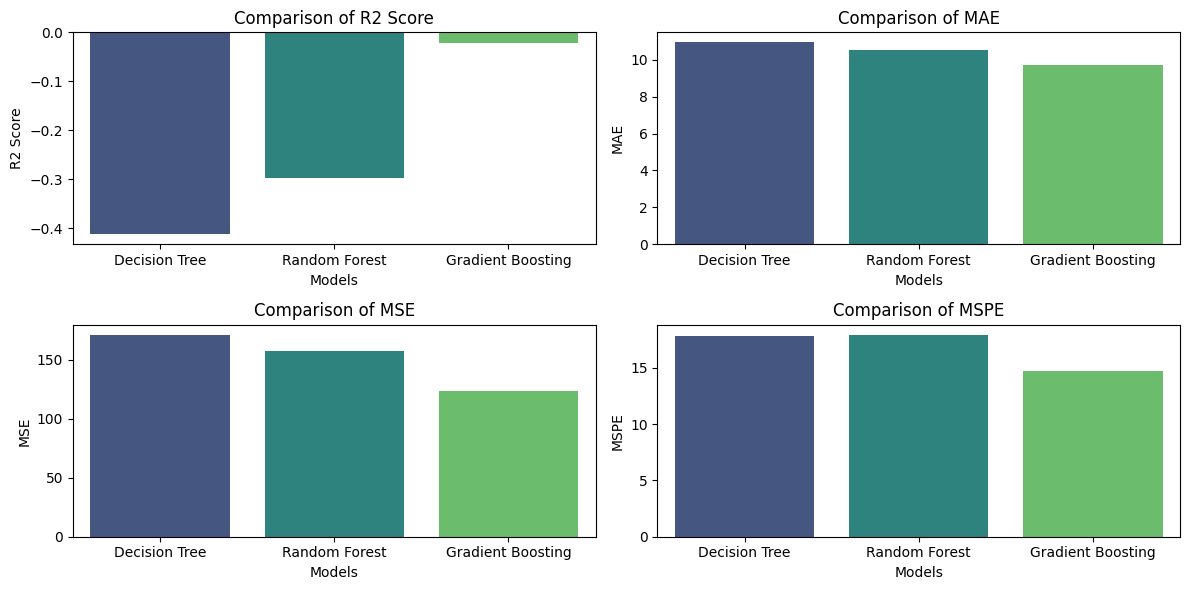

In [41]:
plt.figure(figsize=(12, 6))
metrics = ["R2 Score", "MAE", "MSE", "MSPE"]
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=results_df.index, y=results_df[metric], palette="viridis")
    plt.title(f"Comparison of {metric}")
    plt.xlabel("Models")
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
